__*Class*__: Text Minig[BAT54201]

__*Professor*__: Lee, Junghye

__*Due Date*__: 2018-03-12, Monday

>__*Team*__: DW(Don't Worry)

>__*Member*__: Cha, Ukhyeon(20176022) / Lee, Doyeon(20176026)

## Introduction

>While looking for common interest with each other, we concluded “Health” as common interest among many other fields. The goal of our assignment is to see the difference in recognition of health between South Korea and U.S.A. Therefore, we gathered 5 news articles each from The Korea Herald and The New York Times which are representative English newspaper for each country. 

## Environment Setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from collections import Counter
from string import punctuation
from nltk.stem import PorterStemmer
from operator import itemgetter
from math import floor, log

from stopwords import stopwords
from replacer import RegexpReplacer

%matplotlib inline

## Pre-Processing

In [2]:
k_files = ['k{}.txt'.format(number) for number in range(1, 6)]
N_files = ['N{}.txt'.format(number) for number in range(1, 6)]

#### *Tokenization: tokenize each document into tokens.* 

>For the very first process, we conducted tokenization and normalization process together. Before splitting document into tokens, we deleted every punctuations except apostrophe. Since apostrophe is abbreviated form, we later lengthened by using package. Then document is split to words without any punctuation.   

In [3]:
def import_corpus(filename):
    """
    Read a input file and make them into a word list.
    e.g. parameter
    <filename> "filename.txt"
    """
    words = []

    symbols = punctuation.replace('\'','')
    
    with open(filename) as file:
        content = file.read().strip()
        for symbol in symbols:
            content = content.replace(symbol, '')
        words = words + content.split()

    return words

>For example, show 10 element of a list of 'k1.txt'

In [4]:
import_corpus('k1.txt')[:10]

['South',
 'Korean',
 'adults',
 'run',
 'the',
 'risk',
 'of',
 'chronic',
 'diseases',
 'due']

In [5]:
def create_corpus(filenames):
    """
    Read indivisual files and make them into a word list.
    e.g. parameter
    <filename> above k_files of N_files
    """
    # All words appearing in multiple files are stored in words list.
    words = []

    # When it reads files, removes all special symbols, including punctuation marks.
    symbols = punctuation.replace('\'','')
    
    for filename in filenames:
        with open(filename) as file:
            content = file.read().strip()
            for symbol in symbols:
                content = content.replace(symbol, '')
            words = words + content.split()

    return words

>For example,the number of k_files containing all word exept for punctuation marks.

In [6]:
len(create_corpus(k_files))

1753

#### *Normalization: normalize the tokens from step 1.* 

>As another step for normalization, we transformed every word into lowercase. 

In [7]:
def lower_text(document_object):
    """
    Converts the text of all imported files to lowercase.
    """
    lower_corpus_list = []
    
    for char in document_object:
        lower_character = char.lower()
        lower_corpus_list.append(lower_character)
        
    return lower_corpus_list

>For example,

In [8]:
lower_text(['UNIST Student'])

['unist student']

>The class that we made named RegexpReplacer changes documents to alternative pattern. Therefore, word containing apostrophe is lengthened like "don't" to "do not".

In [9]:
def unset_apostrophe(lower_corpus_list):
    """
    This function needs to import RegexpReplacer.
    """
    replacer = RegexpReplacer()
    
    unset_apostrophe_list = []
    
    for element in lower_corpus_list:
        temp_elem = replacer.replace(element)
        unset_apostrophe_list.append(temp_elem.replace('\'',''))
        
    return unset_apostrophe_list

>For example,

In [10]:
unset_apostrophe(['i\'m a student', 'i can\'t do this'])

['i am a student', 'i can not do this']

#### *Stopword removal: remove stopwords.*

>For the stopword removal process, beside stopwords provided by package, we added stopwords depending out text. Since our text document is news article, there are irrelevant words that doesn’t contain any important information like advertisement of subscription and delivery service. In terms of health context, we included words that show units like percent and million to the stopwords list. In addition, we added words like report, research, journal, professor which seemed to have no meaning. 

In [11]:
def remove_stopword(duplicate_list):
    """
    This function needs to import stopwords.
    Stopwords can be added or removed.
    """
    final_list = duplicate_list.copy()
    
    for word in duplicate_list:
        if word in stopwords:
            final_list.remove(word)
            
    return final_list

#### *Stemming: stem the tokens back to their root form. *

In [12]:
def stem_corpus(before_stem_final_list):
    
    ps = PorterStemmer()
    corpus_list = [ps.stem(stem_word) for stem_word in before_stem_final_list]
    
    corpus = Counter(corpus_list)
    
    return list(corpus.items())

## Understand Zipf's Law 

#### *Zipf's curve*

In [13]:
def zipfs_curve(stem_corpus_list):
    
    words = [tup[0] for tup in stem_corpus_list]
    freqs = [tup[1] for tup in stem_corpus_list]
    
    ranks = [rank+1 for rank in range(len(words))]
    
    font = fm.FontProperties(fname='./NanumBarunGothic.ttf')
    plt.figure(figsize=(14,4))
    plt.plot(ranks, freqs, c="b", lw=2, ls="--", marker="o", ms=5, mec="g", mew=2, mfc="r")
    
    plt.xlabel('rank', fontproperties=font, fontsize=14)
    plt.title('Zipf\'s Law', fontproperties=font, fontsize=20)
    plt.ylabel('frequency', fontproperties=font, fontsize=14)
    plt.tight_layout()

>When defining cut-off points, our team arbitrarily decided to cut 20 percent of zipf's curve referring to "20:80 rule". Therefore, we set upper cut-off and lower cut-off point to 10 percent each. 

#### *Decide to cut-off*

In [14]:
def cut_zipfs_curve(stem_corpus_list, cut=0.1):
    
    words = [tup[0] for tup in stem_corpus_list]
    freqs = [tup[1] for tup in stem_corpus_list]
    ranks = [rank+1 for rank in range(len(words))]
    
    cutoff = floor(len(words)*cut)
    re_words = words[cutoff:-cutoff]
    re_freqs = freqs[cutoff:-cutoff]
    re_ranks = [re+1 for re in range(len(re_words))]
    
    font = fm.FontProperties(fname='./NanumBarunGothic.ttf')
    plt.figure(figsize=(16,6))
    plt.plot(re_ranks, re_freqs, c="b", lw=2, ls="--", marker="o", ms=5, mec="g", mew=2, mfc="r")
    
    plt.xlabel('rank', fontproperties=font, fontsize=14)
    plt.title('Zipf\'s law(cut-off)', fontproperties=font, fontsize=20)
    plt.ylabel('frequency', fontproperties=font, fontsize=14)
    plt.tight_layout()

## Construct a Vocabulary 

#### *List the resulting vocabulary.*

In [15]:
def list_voca(stem_corpus_list, cutoff=False, cut=0.1):
    """
    Returns a list of stemming corpus. 
    It is the default that the cutoff parameter is False. 
    In addition, the cutoff value can be determined by entering the cutoff parameter.
    e.g. parameter
    <cutoff> True or False
    <cut> From 0.0 to 1.0
    """
    cutNum = floor(len(stem_corpus_list)*cut)

    if cutoff == True:
        return [tup[0] for tup in stem_corpus_list][cutNum:-cutNum]
      
    else:
        return [tup[0] for tup in stem_corpus_list]

#### *List top 50 and bottom 50 words according to TF in the resulting vocabulary, and represent their corresponding IDFs. *


>We used formula from lecture for both TF and IDF.

In [16]:
def tf(stem_corpus_list):
    """
    input data structure has a list with tuples(word, counts)
    e.g. [(word1, counts), (word2, counts), ... ]
    """
    x = [tup[1] for tup in stem_corpus_list]
    tf_list = []
    
    for elem in x:
        y = .5 + .5*float(elem) / max(x)
        tf_list.append(y)
    return tf_list    

In [17]:
def idf(stem_corpus_list, doc_list):
    """
    input data structure has a list with tuples(word, counts).
    and doc_list is a list of document.
    e.g. parameter
    stem_corpus_list = [(word1, counts), (word2, counts), ... ]
    if doument is 1, doc_list = [stem_corpus_list] 
    """
    M = len(doc_list)
    words = [tup[0] for tup in stem_corpus_list]
    
    idf_list = []
    word_count=0
    
    for doc in doc_list:
        for word in words: 
            if word in doc:
                word_count+=1
            idf_w = log((M+1) / (word_count+1))
            idf_list.append(idf_w)
            
    return idf_list

In [18]:
def list_N_top_bottom(word, tf, idf, num = 50):
    """
    Return a data frame with words, term frequency, inverse document frequency
    e.g. parameter
    <num> Decide whether to show the top or bottom result.
    """
    df = pd.DataFrame()
    
    df['Words'] = word[:num] + word[-num:]
    df['TF'] = tf[:num] + tf[-num:]
    df['IDF'] = idf[:num] + idf[-num:]
    
    return df

## Compute Similarity between documents 

#### *Paste your implementation of similarity computation*

In [19]:
def jaccard(s1, s2):
    
    set1, set2 = set(s1), set(s2)
    
    return len(set1 & set2) / float(len(set1 | set2))

#### *For each document, list the top 3 most similar documents and the corresponding similarity. Please define your similarity. *

>Similarity was calculated by jaccard distance. Jaccard distance which measures dissimilarity between sample sets, is complementary to the Jaccard coefficient and is obtained by subtracting the Jaccard coefficient from 1, or, equivalently, by dividing the difference of the sizes of the union and the intersection of two sets by the size of the union:

>>$J(A,B) = { { |A \cup B| - |A \cap B| } \over |A \cup B| }.$

>For example,

>A = {1,2,3,4}, B = {3,4,5,6}

In [20]:
print('Jaccard Similarity',jaccard([1,2,3,4],[3,4,5,6]))

Jaccard Similarity 0.3333333333333333


## Unit Test

[('drug', 18), ('plan', 9), ('discount', 8), ('rebat', 8), ('unitedhealthcar', 7), ('big', 1), ('number', 1), ('choos', 1), ('happen', 1), ('slowli', 1)]
(100, 3)


,Words,TF,IDF
0,drug,1.000000,0.693147
1,plan,0.750000,0.693147
2,discount,0.722222,0.693147
3,rebat,0.722222,0.693147
4,unitedhealthcar,0.694444,0.693147


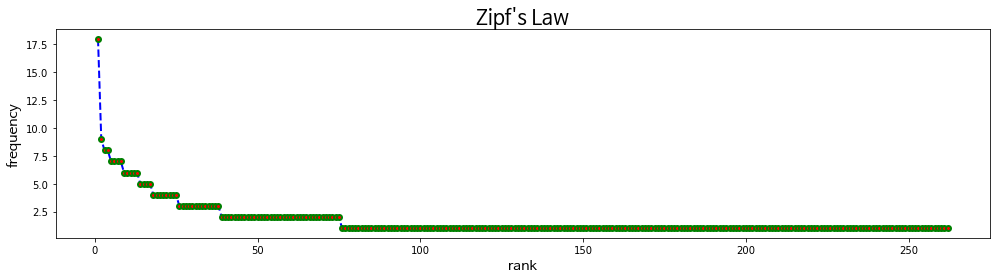

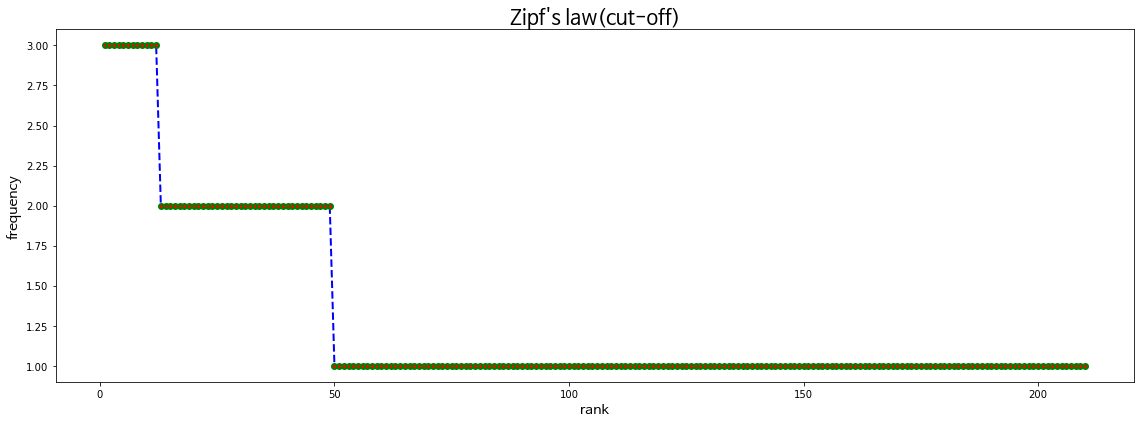

In [21]:
single = import_corpus('N1.txt')

single = lower_text(single)

single = unset_apostrophe(single)

single = remove_stopword(single)

single = stem_corpus(single)

single = sorted(single, key=itemgetter(1), reverse=True)
print(single[:5] + single[-5:])

zipfs_curve(single)

cut_zipfs_curve(single, cut=0.1)

list_voca(single)

wordL = list_voca(single)

tfL = tf(single)

idfL = idf(single, [single])

df_voca = list_N_top_bottom(wordL, tfL ,idfL)
print(df_voca.shape)
df_voca.head()

#### *For main function*

In [22]:
def loopUI(func, bunch):
    
    result = []
    for elem in bunch:
        para = func(elem)
        result.append(para)
        
    return result

Zipf's Law Cuve of Document1
Zipf's Law Cuve of Document2
Zipf's Law Cuve of Document3
Zipf's Law Cuve of Document4
Zipf's Law Cuve of Document5
Zipf's Law Cuve of Document6
Zipf's Law Cuve of Document7
Zipf's Law Cuve of Document8
Zipf's Law Cuve of Document9
Zipf's Law Cuve of Document10
Zipf's Law Cuve with cut-off of Document1
Zipf's Law Cuve with cut-off of Document2
Zipf's Law Cuve with cut-off of Document3
Zipf's Law Cuve with cut-off of Document4
Zipf's Law Cuve with cut-off of Document5
Zipf's Law Cuve with cut-off of Document6
Zipf's Law Cuve with cut-off of Document7
Zipf's Law Cuve with cut-off of Document8
Zipf's Law Cuve with cut-off of Document9
Zipf's Law Cuve with cut-off of Document10
Jaccard Similarity Matrix
           Doc1      Doc2      Doc3      Doc4      Doc5      Doc6      Doc7  \
Doc1   1.000000  0.031056  0.066298  0.047368  0.036810  0.014409  0.022222   
Doc2   0.031056  1.000000  0.022857  0.027778  0.055375  0.040000  0.026087   
Doc3   0.066298  0.022857

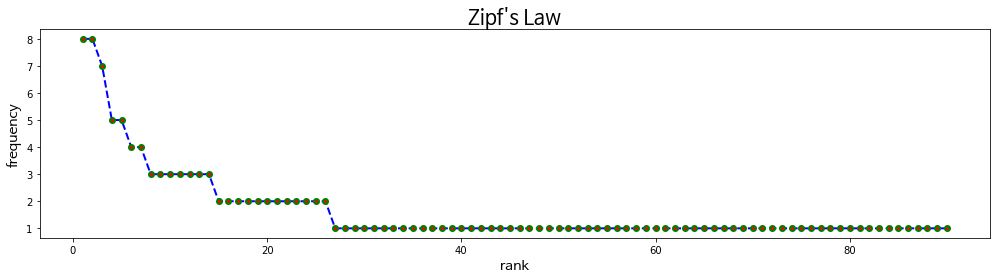

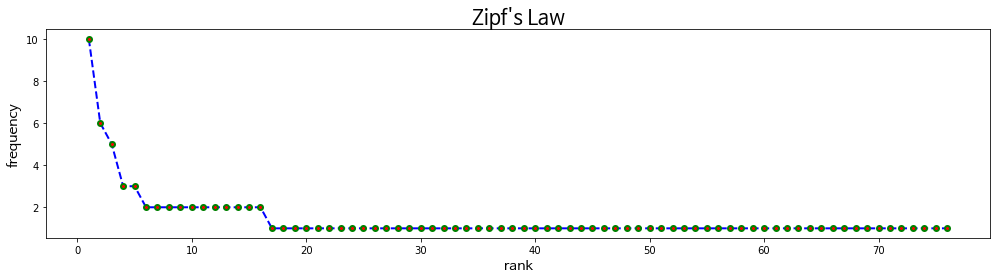

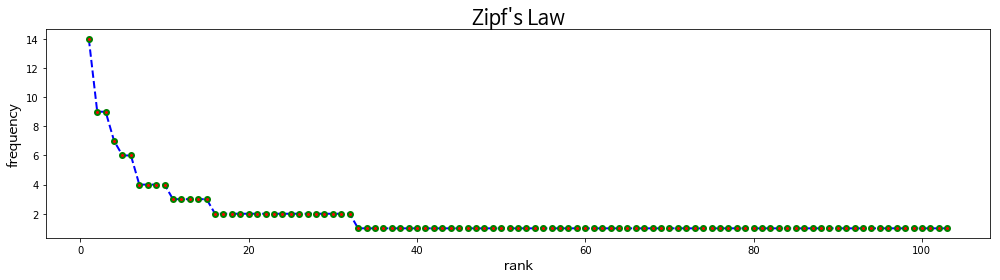

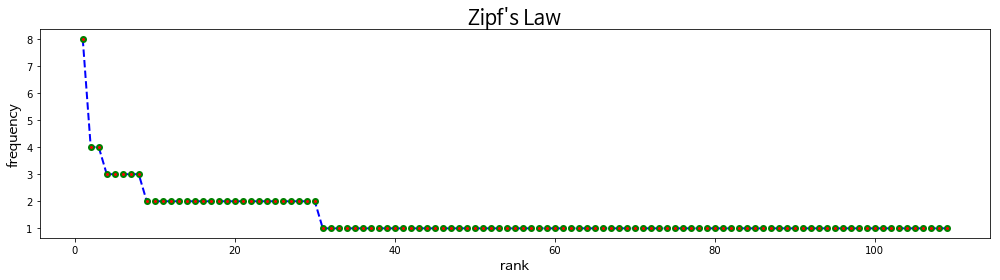

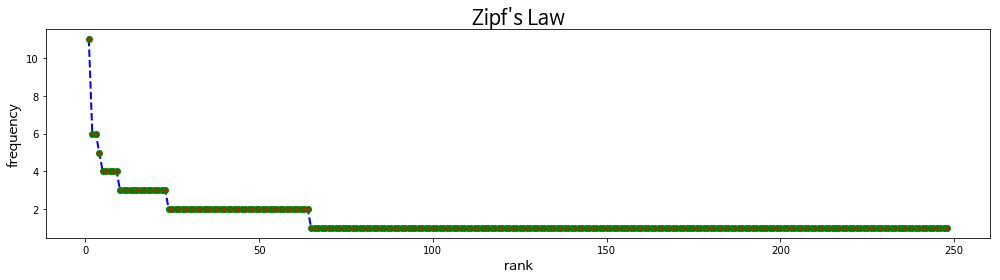

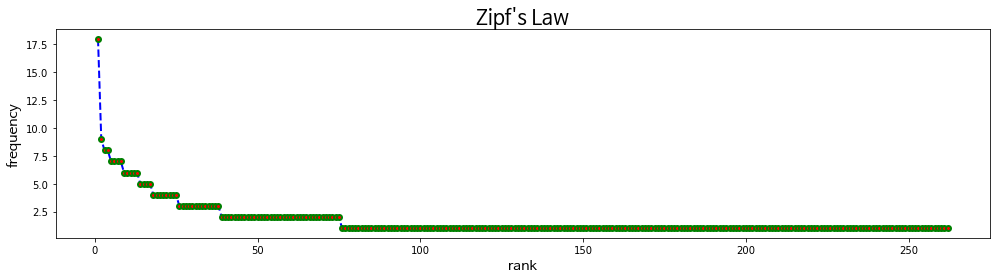

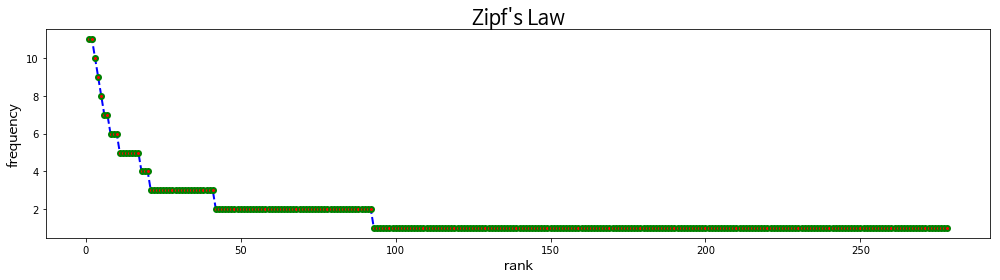

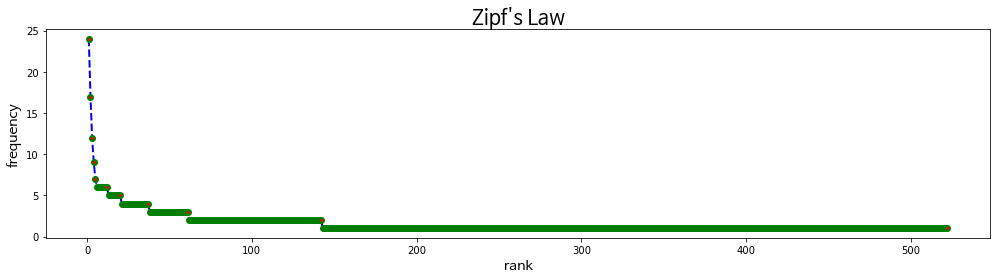

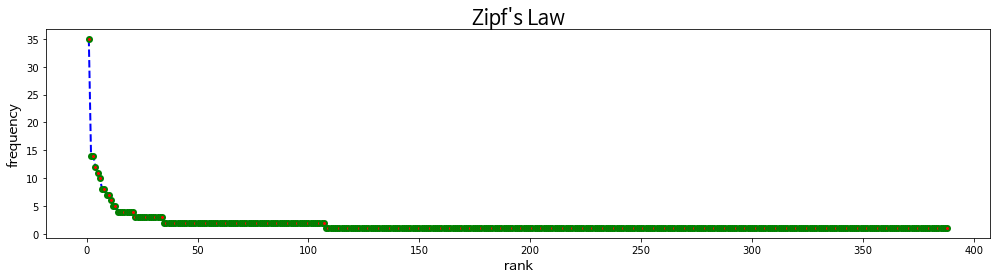

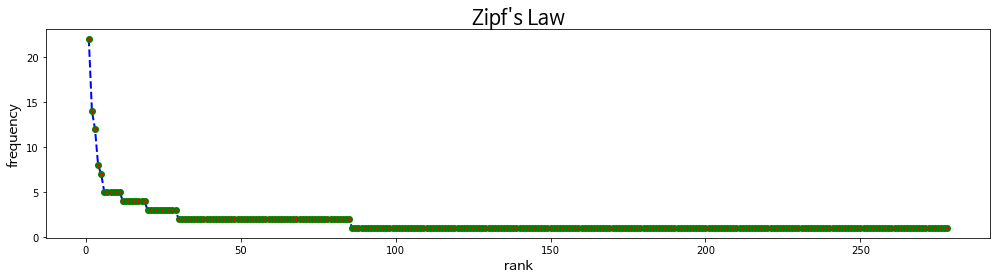

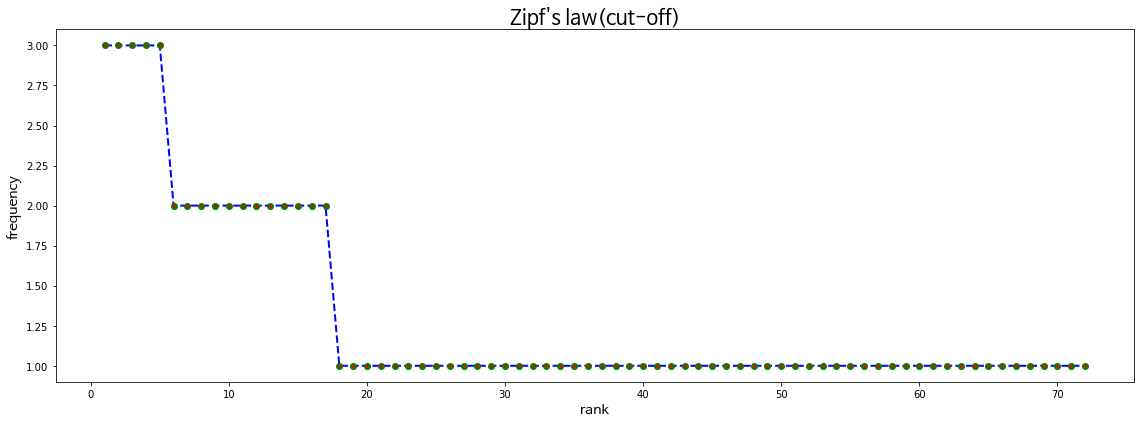

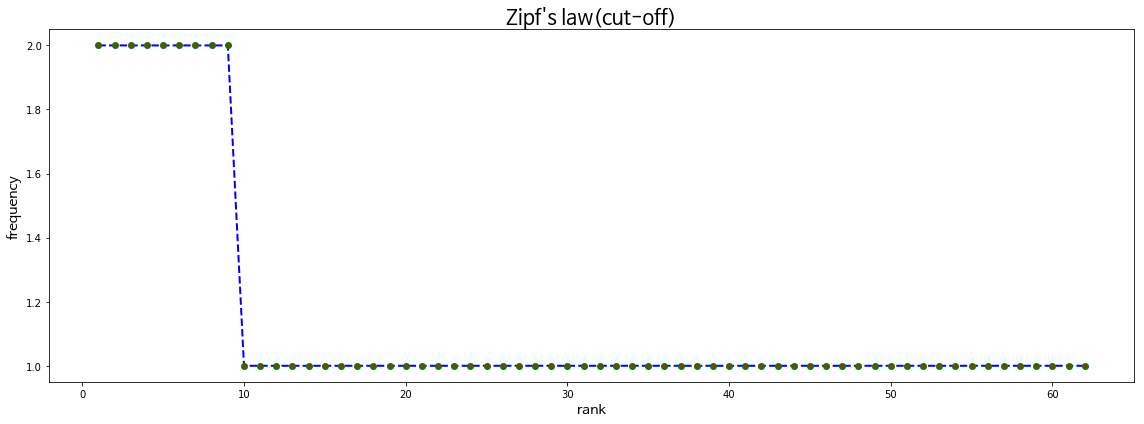

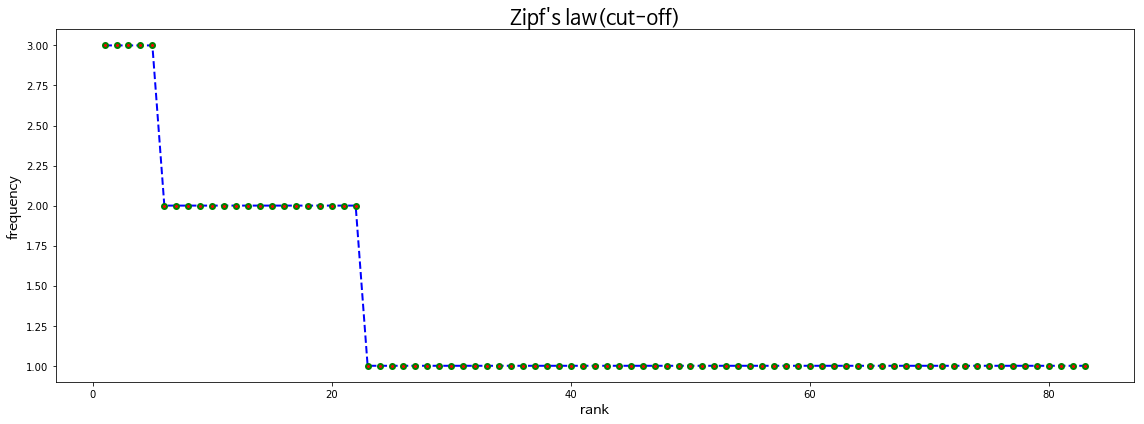

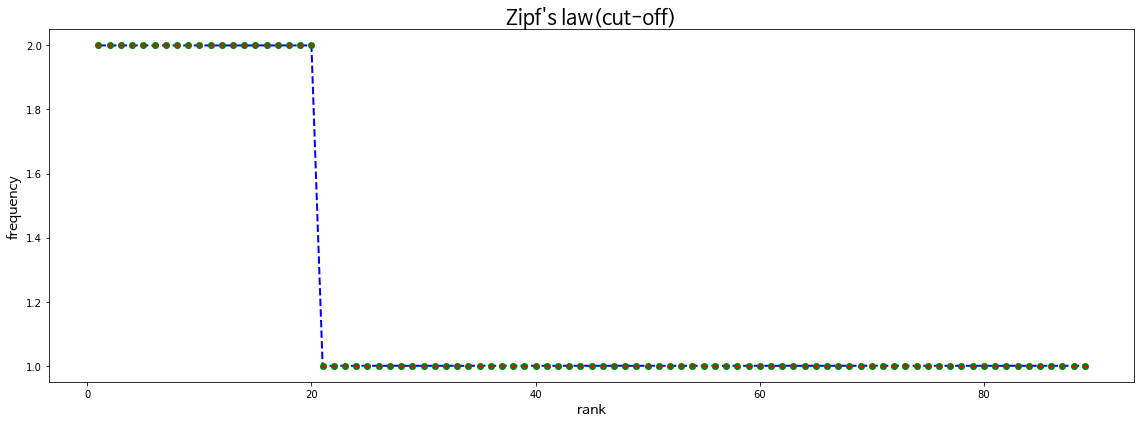

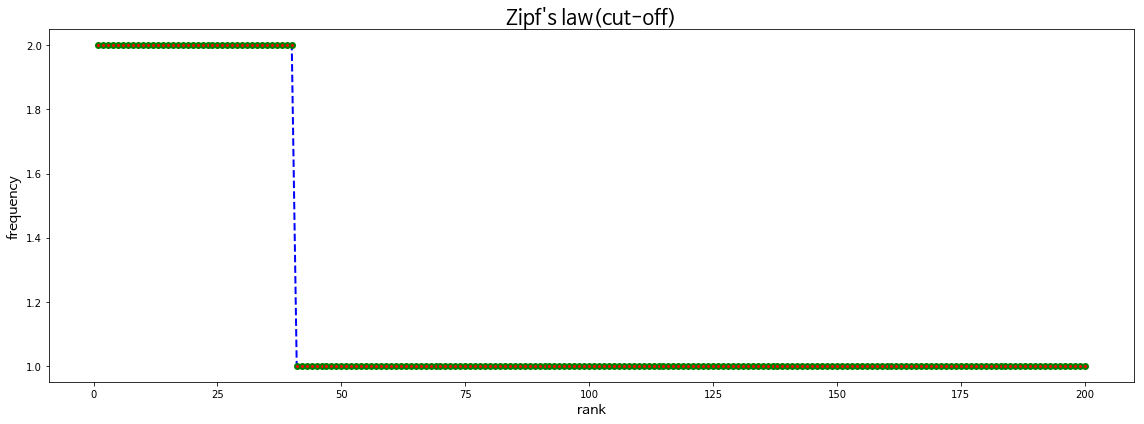

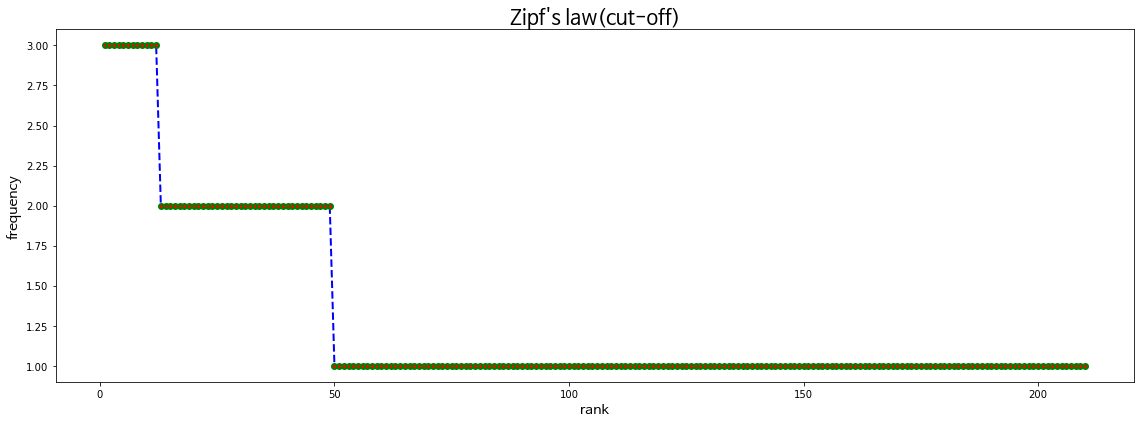

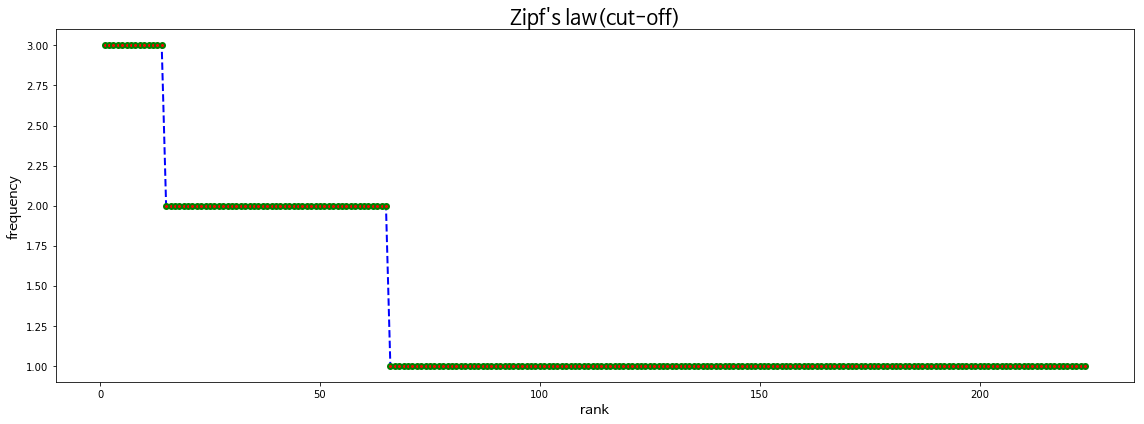

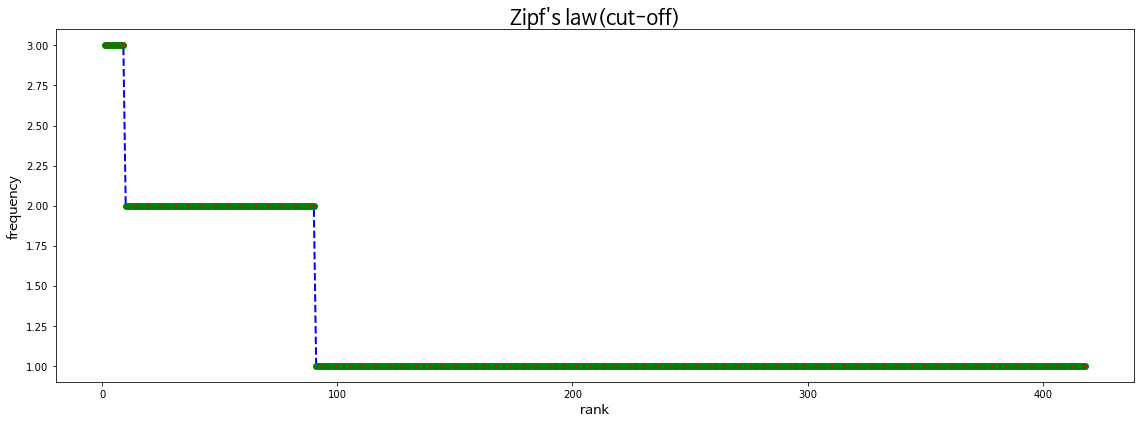

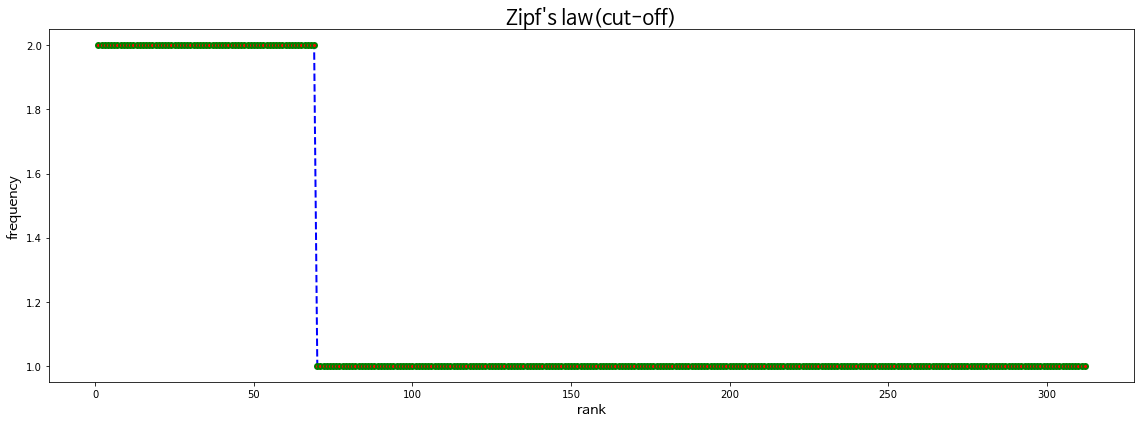

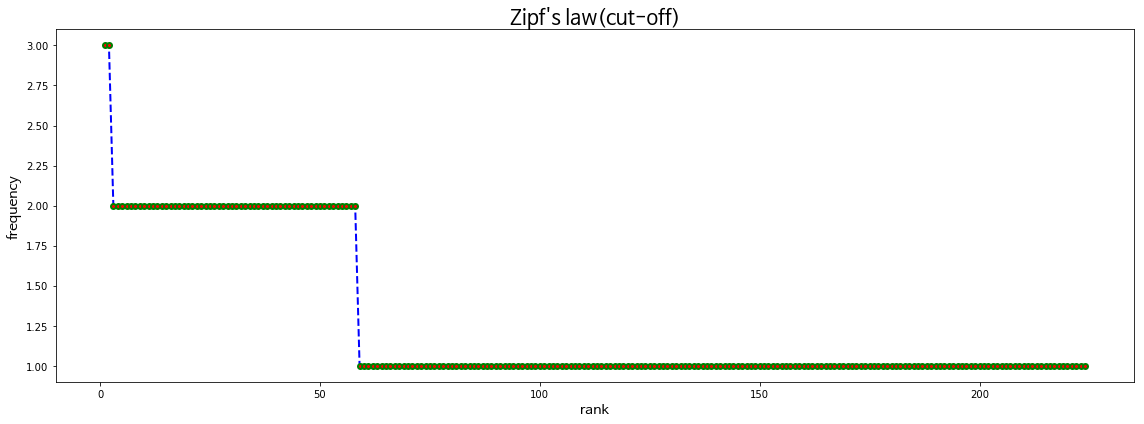

In [23]:
def main():
    
    #1
    korea = loopUI(import_corpus, k_files)
    newyork = loopUI(import_corpus, N_files)
    document = korea + newyork
    total = k_files + N_files
    
    lower_doc = loopUI(lower_text, document)
    
    unset_doc = loopUI(unset_apostrophe, lower_doc)
    
    stop_doc = loopUI(remove_stopword, unset_doc)
    
    stem_doc = loopUI(stem_corpus, stop_doc)
    
    #2
    for doc in stem_doc:
        print('Zipf\'s Law Cuve of Document{}'.format(stem_doc.index(doc)+1))
        zipfs_curve(sorted(doc, key=itemgetter(1), reverse=True))
        
    for doc in stem_doc:
        print('Zipf\'s Law Cuve with cut-off of Document{}'.format(stem_doc.index(doc)+1))
        cut_zipfs_curve(sorted(doc, key=itemgetter(1), reverse=True), cut=0.1)
    
    #3
    voca_doc = loopUI(list_voca, stem_doc)
    tf_doc = loopUI(tf, stem_doc)
    
    idf_doc = []
    for stem in stem_doc:
        temp = idf(stem, total)
        idf_doc.append(temp)
    
    doc_df1 = list_N_top_bottom(voca_doc[0], tf_doc[0], idf_doc[0], num = 50)
    doc_df2 = list_N_top_bottom(voca_doc[1], tf_doc[1], idf_doc[1], num = 50)
    doc_df3 = list_N_top_bottom(voca_doc[2], tf_doc[2], idf_doc[2], num = 50)
    doc_df4 = list_N_top_bottom(voca_doc[3], tf_doc[3], idf_doc[3], num = 50)
    doc_df5 = list_N_top_bottom(voca_doc[4], tf_doc[4], idf_doc[4], num = 50)
    
    doc_df6 = list_N_top_bottom(voca_doc[0], tf_doc[0], idf_doc[0], num = 50)
    doc_df7 = list_N_top_bottom(voca_doc[1], tf_doc[1], idf_doc[1], num = 50)
    doc_df8 = list_N_top_bottom(voca_doc[2], tf_doc[2], idf_doc[2], num = 50)
    doc_df9 = list_N_top_bottom(voca_doc[3], tf_doc[3], idf_doc[3], num = 50)
    doc_df10 = list_N_top_bottom(voca_doc[4], tf_doc[4], idf_doc[4], num = 50)
    
    #4
    doc_mat = np.zeros((10,10))
    for row in range(len(voca_doc)):
        for col in range(len(voca_doc)):
            doc_mat[row][col] = jaccard(voca_doc[row], voca_doc[col])
    
    final = pd.DataFrame(doc_mat)
    final.columns = ['Doc{}'.format(number) for number in range(1,11)]
    final.index = ['Doc{}'.format(number) for number in range(1,11)]
    
    print('Jaccard Similarity Matrix')
    print(final)
    
    
if __name__ == '__main__':
    main()

#### *Conclusion*

>For document 1, document 3, 9, 4 are the most similar documents with 0.054348, 0.051613, 0.046392.

>For document 2, document 10, 5, 4 are the most similar documents with 0.058309, 0.057325, 0.043011.

>For document 3, document 1, 6, 10 are the most similar documents with same similarity of 0.054348.

>For document 4, document 7, 5, 10 are the most similar documents with 0.057743, 0.054755, 0.047493.

>For document 5, document 8, 10, 7 are the most similar documents with 0.101124, 0.100823, 0.082000.

>For document 6, document 10, 8, 9 are the most similar documents with 0.125249, 0.122590, 0.101613.

>For document 7, document 8, 6, 9 are the most similar documents with 0.145049, 0.100000, 0.088468.

>For document 8, document 7, 10, 6 are the most similar documents with 0.145049, 0.124138, 0.122590.

>For document 9, document 8, 10, 7 are the most similar documents with 0.109524, 0.094551, 0.088468.

>For document 10, document 6, 8, 9 are the most similar documents with 0.125249, 0.124138, 0.094551.

## Reference

>reference[[1]] [site1] Tistory related to Zipf's Law
[site1]: http://bab2min.tistory.com/497

>reference[[2]] [site2] Text Mining: Term vs. Document Frequency
[site2]: http://uc-r.github.io/tf-idf_analysis

>reference[[3]] [site3] The Korea Herald 
[site3]: http://www.koreaherald.com/list.php?ct=020309000000

-__*End of Document*__-